In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [281]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.graph_objects as go
import missingno as msno
from joblib import Parallel, delayed
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
sns.set()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ckd_____.csv to ckd_____.csv


In [ ]:
df = pd.read_csv('ckd____.csv') 
df.head(5)

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33


In [ ]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 3000
Number of Columns: 4


In [ ]:
"""
ammonia = np.random.randint(0, 16000, size=3000)
gender = np.random.randint(0, 2, size=3000)
height = np.random.randint(100, 220, size=3000)
weight = np.random.randint(40, 150, size=3000)

df = df.assign(AmmoniaBreath=ammonia, Gender=gender, Height=height, Weight=weight)

# Define the bin edges for the different CKD values
bins = [0, 600, 1000, 1900, 4000, 12000, 16000]

# Use numpy.digitize() to assign each ammonia value to a bin and create the CKD column
df['CKD'] = np.digitize(df['AmmoniaBreath'], bins) - 1

print(df)
print(df.dtypes)
print(df['CKD'].value_counts())

# df.to_csv('ckdd.csv', index=False)
"""

      Glucose  BloodPressure   BMI   Age  AmmoniaBreath  Gender  Height  \
0        78.0          116.0  35.0  73.0           5407       0     153   
1       233.0          121.0  23.0  57.0          10127       0     136   
2       112.0          139.0  39.0  71.0           6443       1     123   
3        98.0          104.0  38.0  34.0            243       1     116   
4       108.0          126.0  27.0  30.0           6334       1     195   
...       ...            ...   ...   ...            ...     ...     ...   
2995      NaN            NaN   NaN   NaN            346       0     135   
2996      NaN            NaN   NaN   NaN          15834       0     149   
2997      NaN            NaN   NaN   NaN          10675       0     152   
2998      NaN            NaN   NaN   NaN           6409       1     128   
2999      NaN            NaN   NaN   NaN          13691       1     136   

      Weight  CKD AmmoniaThreshold  CKD0  CKD1  CKD2  CKD3  CKD4  CKD5    ckd  
0         55    4  

In [ ]:
bins = [0, 600, 1000, 1940, 4400, 12000, 16000]

ckd0 = np.linspace(bins[0], bins[1], num=500)
ckd1 = np.linspace(bins[1]+1, bins[2], num=500)
ckd2 = np.linspace(bins[2]+1, bins[3], num=500)
ckd3 = np.linspace(bins[3]+1, bins[4], num=500)
ckd4 = np.linspace(bins[4]+1, bins[5], num=500)
ckd5 = np.linspace(bins[5]+1, bins[6], num=500)

ammonia = np.concatenate((ckd0, ckd1, ckd2, ckd3, ckd4, ckd5))
gender = np.random.randint(0, 2, size=3000)
height = np.random.randint(100, 220, size=3000)
weight = np.random.randint(40, 150, size=3000)

df = df.assign(AmmoniaBreath=ammonia, Gender=gender, Height=height, Weight=weight)

df['CKD'] = np.digitize(df['AmmoniaBreath'], bins) - 1

print(df)
print(df['CKD'].value_counts())

df.to_csv('ckd____.csv', index=False)

      Glucose  BloodPressure   BMI  Age  AmmoniaBreath  Gender  Height  \
0         148             72  33.6   50       0.000000       1     130   
1          85             66  26.6   31       1.202405       0     215   
2         183             64  23.3   32       2.404810       0     191   
3          89             66  28.1   21       3.607214       0     155   
4         137             40  43.1   33       4.809619       0     144   
...       ...            ...   ...  ...            ...     ...     ...   
2995      152            102  25.0   63   15967.943888       0     202   
2996      225            134  28.0   69   15975.957916       0     170   
2997      109            108  33.0   60   15983.971944       1     102   
2998      203            124  27.0   43   15991.985972       1     188   
2999      148            128  19.0   62   16000.000000       1     153   

      Weight  CKD  
0         86    0  
1        128    0  
2        101    0  
3        139    0  
4        14

In [ ]:
class_names = ['0','1','2','3','4','5','6']

In [ ]:
df.head(3000)

,Glucose,BloodPressure,BMI,Age,AmmoniaBreath,Gender,Height,Weight,CKD
0,148,72,33.6,50,0.000000,1,109,81,0
1,85,66,26.6,31,1.202405,0,131,74,0
2,183,64,23.3,32,2.404810,0,183,104,0
3,89,66,28.1,21,3.607214,1,118,57,0
4,137,40,43.1,33,4.809619,0,172,146,0
...,...,...,...,...,...,...,...,...,...
2995,152,102,25.0,63,15967.943888,1,142,99,5
2996,225,134,28.0,69,15975.957916,1,182,84,5
2997,109,108,33.0,60,15983.971944,1,200,66,5
2998,203,124,27.0,43,15991.985972,1,100,57,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        3000 non-null   int64  
 1   BloodPressure  3000 non-null   int64  
 2   BMI            3000 non-null   float64
 3   Age            3000 non-null   int64  
 4   AmmoniaBreath  3000 non-null   float64
 5   Gender         3000 non-null   int64  
 6   Height         3000 non-null   int64  
 7   Weight         3000 non-null   int64  
 8   CKD            3000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 211.1 KB


In [ ]:
df.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
Age              0
AmmoniaBreath    0
Gender           0
Height           0
Weight           0
CKD              0
dtype: int64

In [ ]:
df.shape

(3000, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Gender.value_counts()

0    1508
1    1492
Name: Gender, dtype: int64

In [ ]:
df.corr()

,Glucose,BloodPressure,BMI,Age,AmmoniaBreath,Gender,Height,Weight,CKD
Glucose,1.000000,0.237161,-0.024767,0.215735,0.321756,0.004762,-0.003790,-0.018774,0.314876
BloodPressure,0.237161,1.000000,-0.132419,0.484091,0.379068,-0.011467,-0.009187,-0.002219,0.569103
BMI,-0.024767,-0.132419,1.000000,-0.126372,-0.152666,0.012041,-0.005776,-0.011887,-0.204939
Age,0.215735,0.484091,-0.126372,1.000000,0.367323,0.010252,-0.019169,-0.042287,0.488468
AmmoniaBreath,0.321756,0.379068,-0.152666,0.367323,1.000000,0.027688,-0.018456,0.003129,0.893257
Gender,0.004762,-0.011467,0.012041,0.010252,0.027688,1.000000,-0.011338,-0.036356,0.023810
Height,-0.003790,-0.009187,-0.005776,-0.019169,-0.018456,-0.011338,1.000000,0.025219,-0.016409
Weight,-0.018774,-0.002219,-0.011887,-0.042287,0.003129,-0.036356,0.025219,1.000000,0.004657
CKD,0.314876,0.569103,-0.204939,0.488468,0.893257,0.023810,-0.016409,0.004657,1.000000


<Axes: >

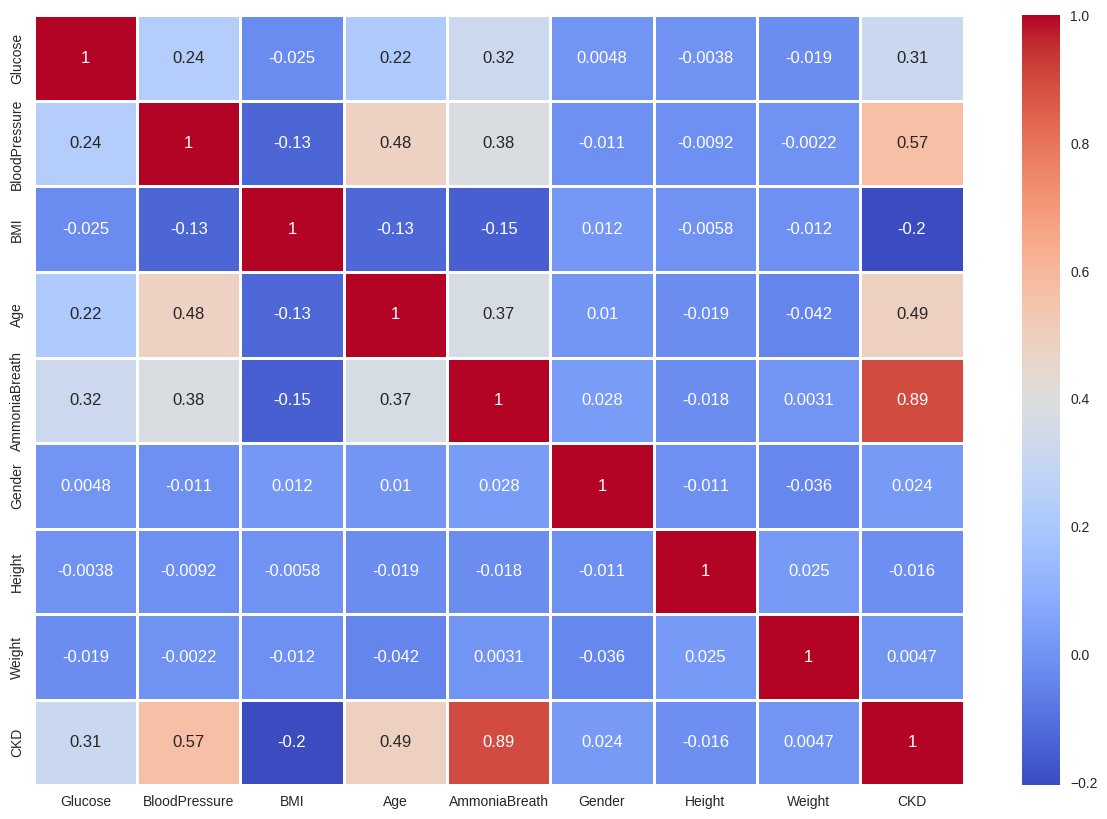

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [ ]:
corr=df.corr()
corr.sort_values(by=['CKD'],ascending=False).iloc[0].sort_values(ascending=False)

CKD              1.000000
AmmoniaBreath    0.893257
BloodPressure    0.569103
Age              0.488468
Glucose          0.314876
Gender           0.023810
Weight           0.004657
Height          -0.016409
BMI             -0.204939
Name: CKD, dtype: float64

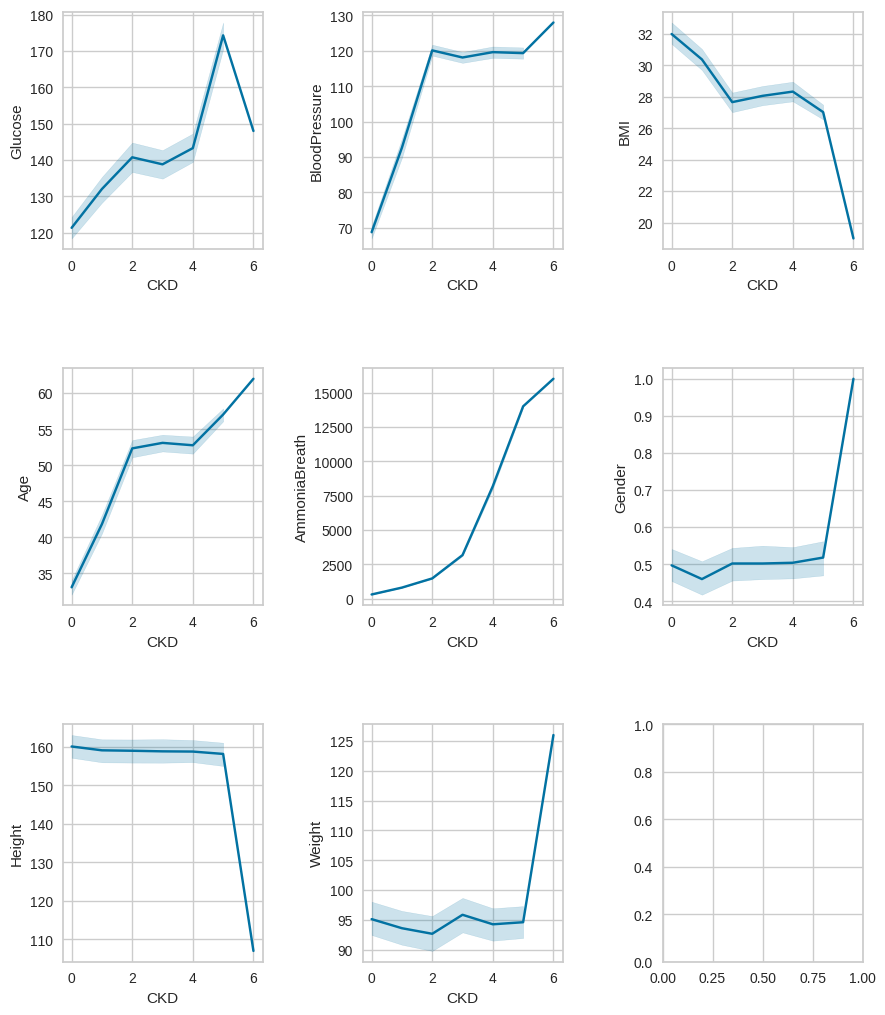

In [ ]:
cols = list(df.columns.values)
cols.remove('CKD')

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.05, top=1.0, wspace=0.5, hspace=0.5)
for i, col in zip(range(len(cols)), cols):
    ax = plt.subplot(3, 3,i+1)
    sns.lineplot(ax=ax,x='CKD', y=col, data=df)

In [ ]:
test= df.sample(frac=0.10, random_state=200)
clean= df[~df.index.isin(test.index)]

test.to_csv("ckd_test.csv", index= False)
clean.to_csv("ckd_clean.csv", index= False)

In [ ]:
Y=clean["CKD"].values
X= clean.drop(['CKD'], axis= 1).to_numpy()
X = (X-np.min(X))/(np.max(X)-np.min(X)) 
print(X.shape)

(2700, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 3)

print(X.shape)
print(Y.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(2700, 8)
(2700,)
(2160, 8)
(540, 8)
(2160,)
(540,)


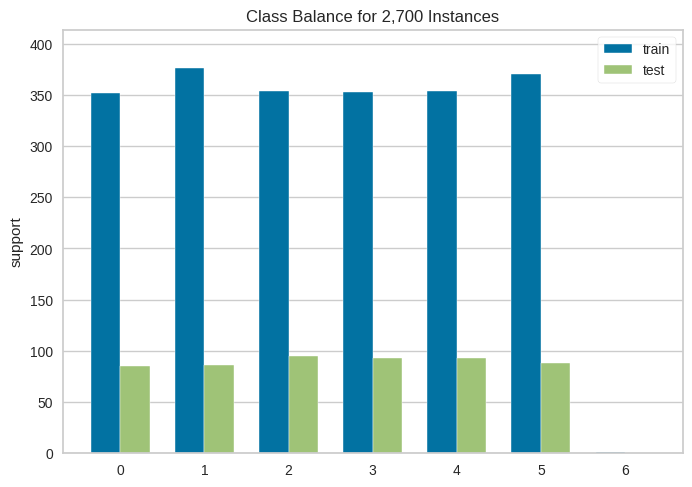

<Axes: title={'center': 'Class Balance for 2,700 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2, 3, 4, 5, 6])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [ ]:
train1= SVC(kernel='rbf', C=2, decision_function_shape='ovo', gamma = 1,random_state=2)
train1.fit(X_train, y_train)
joblib.dump(train1, "ckd_testdata.pkl")

['ckd_testdata.pkl']

In [ ]:
y_pred = train1.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, average= "micro")
recall= recall_score(y_test, y_pred, average= "micro")
print(accuracy, precision, recall)

0.8962962962962963 0.8962962962962963 0.8962962962962963


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(pd.DataFrame(cm))

    0   1   2   3   4   5
0  73  12   0   0   0   0
1   0  86   0   0   0   0
2   0  18  77   0   0   0
3   0   0  14  79   0   0
4   0   0   0   7  81   5
5   0   0   0   0   0  88


In [ ]:
clr = classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        85
           1       0.74      1.00      0.85        86
           2       0.85      0.81      0.83        95
           3       0.92      0.85      0.88        93
           4       1.00      0.87      0.93        93
           5       0.95      1.00      0.97        88

    accuracy                           0.90       540
   macro avg       0.91      0.90      0.90       540
weighted avg       0.91      0.90      0.90       540



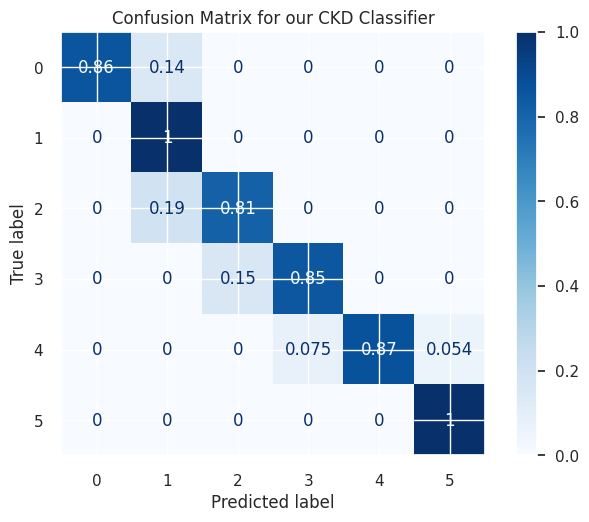

In [ ]:
matrix = ConfusionMatrixDisplay.from_estimator(train1,  X_test, y_test, cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion Matrix for our CKD Classifier')

plt.show(matrix)
plt.show()

In [ ]:
testdata = pd.read_csv('ckd_test.csv')
testdata.shape

(300, 9)

In [ ]:
Y=testdata["CKD"].values
X= testdata.drop(['CKD'], axis= 1).to_numpy()
X = (X-np.min(X))/(np.max(X)-np.min(X)) 
print(X.shape)

(300, 8)


In [ ]:
model = joblib.load("./ckd_testdata.pkl")

In [ ]:
y_pred = model.predict(X)
print(y_pred[:40])
print(Y[:40])

[5 5 0 4 0 0 1 3 4 2 4 0 1 2 4 1 4 2 5 1 0 3 4 5 3 4 5 1 2 4 2 1 5 5 1 3 4
 3 0 0]
[5 5 0 4 0 0 0 3 4 2 4 0 2 2 4 1 4 2 5 1 0 3 4 5 3 4 4 0 2 4 2 1 5 5 1 3 4
 3 0 0]


In [280]:
df = pd.DataFrame()
df['origin'] = y_test[:80]
df['predicted'] = y_pred[:80]

print(df)

    origin  predicted
0        0          5
1        0          5
2        2          0
3        2          4
4        5          0
..     ...        ...
75       5          0
76       2          2
77       2          0
78       0          0
79       3          4

[80 rows x 2 columns]


In [ ]:
pred_class = class_names[train1.predict(X[45].reshape(1,-1))[0] - 1]
actual_class = class_names[Y[45]-1]
pred_class, actual_class

('3', '3')

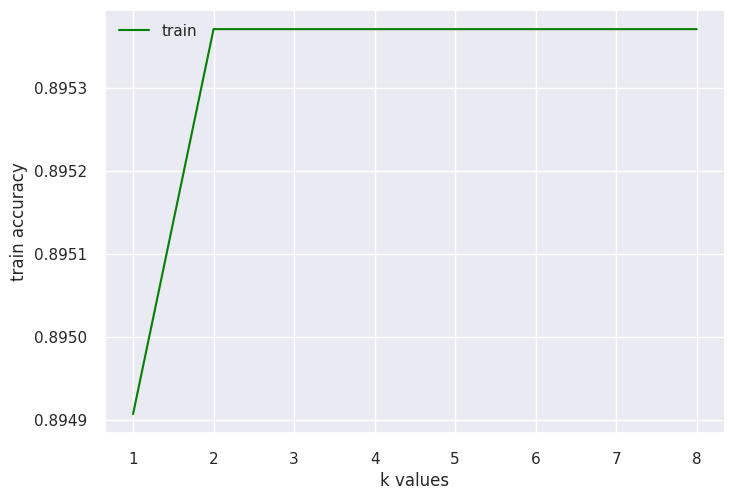

In [ ]:
accuracy_list_train = []
k=np.arange(1,9,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    train1.fit(x_new,y_train)
    accuracy_list_train.append(train1.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()